# 1. Gaussian Kernel Visualizaion

### $ f_1 = exp(-\frac{||x-l^{(1)}||}{2\sigma^2}) $
### $ f_1 = exp(-\frac{||v_1-v_2||}{2\sigma^2}) $



In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def GaussianKernel(v1: np.array, v2: np.array, sigma):
    res = np.exp(-(np.sum(np.power((v1-v2), 2)) / 2*sigma**2))
    return res

In [12]:
val = GaussianKernel(np.array([0, 0]), np.array([3, 5]), 1.0)
val

4.139937718785167e-08

### x1, x2, Z 값  구하기

In [13]:
d = 100
x1 = np.linspace(0, 6, d)
x2 = np.linspace(0, 10, d)
l1 = [3, 5]

Z = np.zeros((d, d))
sigma = 1.5
for i, t1 in enumerate(x1):
    for j, t2 in enumerate(x2):
        val = GaussianKernel(np.array([t1, t2]), l1, sigma)
        Z[i, j] = val

### 그리기

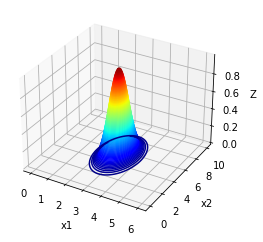

In [14]:
from mpl_toolkits import mplot3d

pX, pY = np.meshgrid(x1, x2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(pX, pY, Z, 100, cmap='jet')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Z')
plt.show()

# 2. Linear SVM Classification
## 1) 데이터 읽기

In [15]:
import numpy as np
from scipy.io import loadmat

data = loadmat('data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [17]:
X = data["X"]
y = data["y"]
m = len(y)

print(X.shape, y.shape)

(51, 2) (51, 1)


## 2) 그래프 그리기

In [19]:
pos = []
neg = []

for (i, val) in enumerate(y):
    if val == 1:
        pos.append(i)
    else:
        neg.append(i)
print(pos)
print(neg)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 50]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


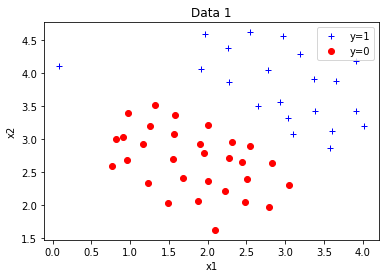

In [21]:
import matplotlib.pyplot as plt

plt.plot(X[pos, 0].reshape(-1), X[pos, 1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg, 0].reshape(-1), X[neg, 1].reshape(-1), 'ro', label='y=0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="upper right")
plt.title("Data 1")
plt.show()

## 3) Train

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ("scalar", StandardScaler()),
    ("linear_svc", LinearSVC(C=10000, loss="hinge"))
])

svm_clf.fit(X, y)

/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scalar', StandardScaler()),
                ('linear_svc', LinearSVC(C=10000, loss='hinge'))])

In [34]:
svm_clf.predict([[2.3, 2.7],
                 [3.7, 3.9]])

array([0, 1], dtype=uint8)

## 4) Decision boundary

/var/folders/l4/0n86l_692hx8xxqz3fqkk6mm0000gn/T/ipykernel_2852/126134034.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


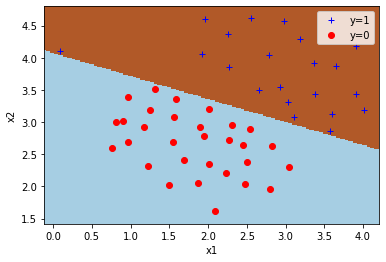

In [35]:
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.plot(X[pos, 0].reshape(-1), X[pos, 1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg, 0].reshape(-1), X[neg, 1].reshape(-1), 'ro', label='y=0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc="upper right")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

# 3. Non-linear SVM Classifier

## 1) 데이터 불러오기

In [36]:
import numpy as np
from scipy.io import loadmat

data = loadmat("data2.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [37]:
X = data["X"]
y = data["y"]
m = len(y)

print(X.shape, y.shape)

(863, 2) (863, 1)


## 2) 그래프 그리기

In [38]:
pos = []
neg = []

for (i, val) in enumerate(y):
    if val == 1:
        pos.append(i)
    else:
        neg.append(i)
print(pos)
print(neg)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,

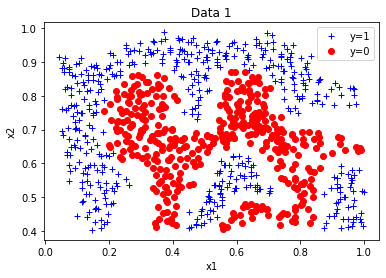

In [39]:
import matplotlib.pyplot as plt

plt.plot(X[pos, 0].reshape(-1), X[pos, 1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg, 0].reshape(-1), X[neg, 1].reshape(-1), 'ro', label='y=0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="upper right")
plt.title("Data 1")
plt.show()

## 3) Train

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf = Pipeline([
    ("scalar", StandardScaler()),
    ("non-linear_svc", SVC(kernel='rbf', gamma=10, C=1))
])

svm_clf.fit(X, y)

/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('scalar', StandardScaler()),
                ('non-linear_svc', SVC(C=1, gamma=10))])

## 4) Decision Boundary

/var/folders/l4/0n86l_692hx8xxqz3fqkk6mm0000gn/T/ipykernel_2852/126134034.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


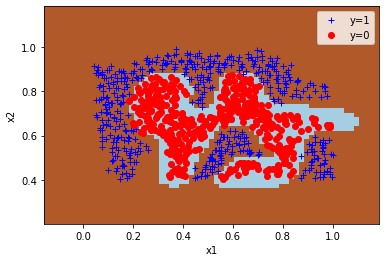

In [41]:
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.plot(X[pos, 0].reshape(-1), X[pos, 1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg, 0].reshape(-1), X[neg, 1].reshape(-1), 'ro', label='y=0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc="upper right")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()